In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler, ADASYN
# from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('../data/ecom-user-churn-data.csv')
df.shape

(49358, 49)

**Variables:**
- ses_rec: time difference from the last user session and current (split) date [days]
- ses_rec_avg: average period between sessions [days]
- ses_rec_sd: standard deviation in time between sessions [days]
- ses_rec_cv: ratio of standard deviation in time to session to average time to session (coefficient of variation) [%]
- user_rec: difference between the start of the first user session and current (split) date [days]
- ses_n: session count [n]
- ses_n_r: ratio of session frequency to account maturity [session/a day] 
- int_n: user–application interaction (view/add-to-cart/buy clicks) count [n]
- int_n_r: ratio of user–app interaction frequency to session frequency [int/session]
- tran_n: transaction count [n]
- tran_n_r: ratio of transactional frequency to session frequency (individual conversion rate) [transaction/session]
- rev_sum: total revenue [USD]
- rev_sum_r: total revenue to session frequency [USD/session] 
- major_spend_rproportion of sessions with above-average spending [%] 
- int_cat_n_avg: average no of distinct root-level categories interacted in session [n]
- int_itm_n_avg: average no of distinct items interacted in session [n]
- ses_mo_avg: average month (session start) 
- ses_mo_sd: standard deviation in months 
- ses_ho_avg: average hour of a day (session start) 
- ses_ho_sd: standard deviation in hours of a day 
- ses_wknd_r: weekend sessions proportion [%] 
- ses_len_avg: average session duration [min] 
- ses_len_avgaverage session duration [min] 
- time_to_tran: average time between transactional events [days] 
- int_catX_n: sum of interactions across root-level categories [n]
- target_classinteraction/no interaction in the following month




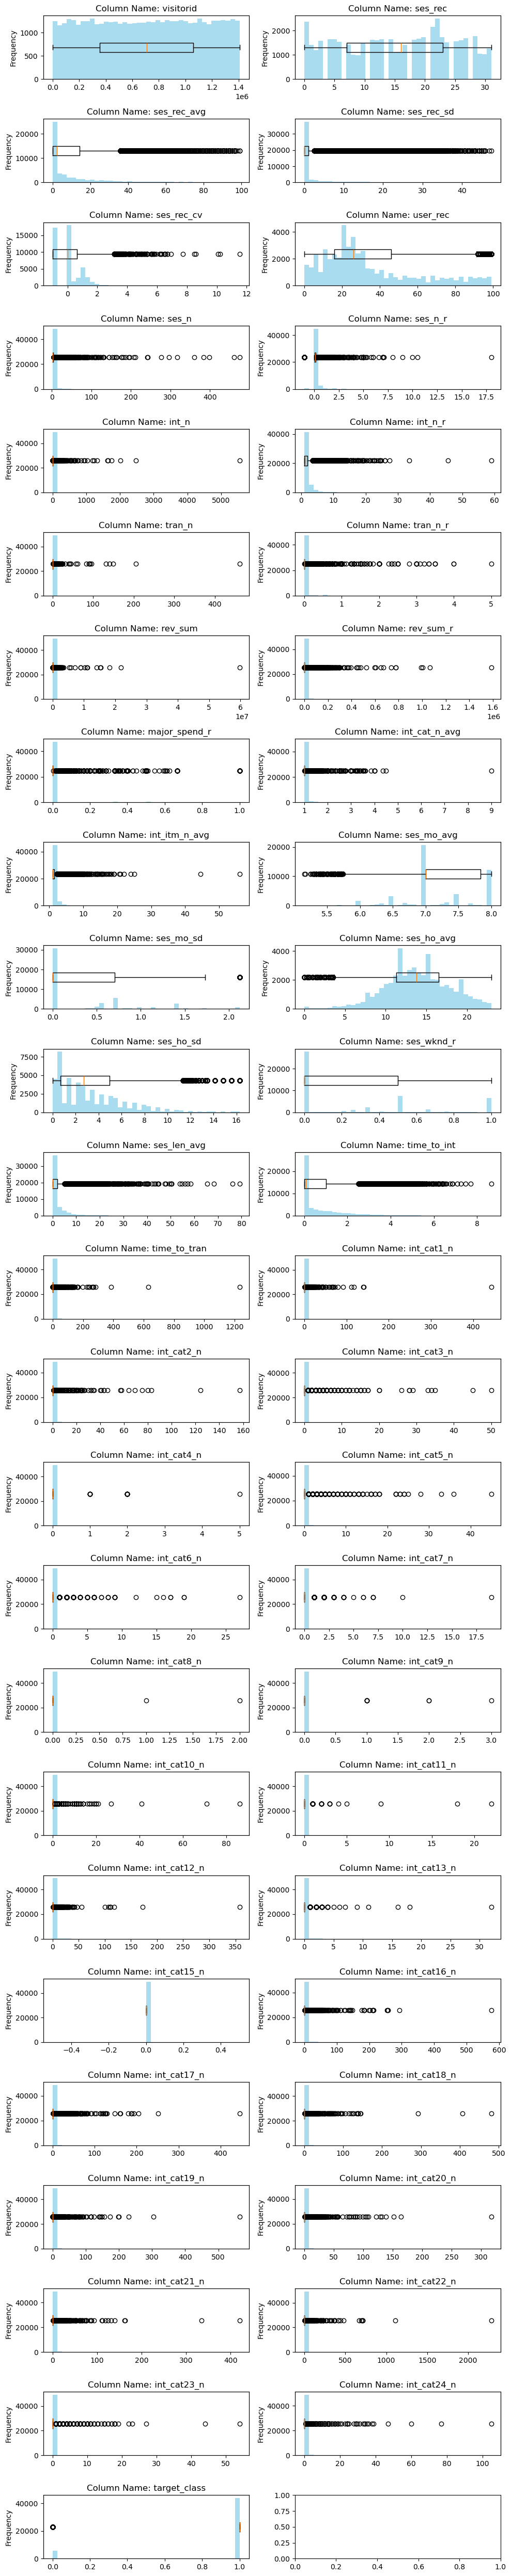

In [10]:
row = int((df.shape[1] / 2) + 1)
cols = 2
pos = range(1, row * cols + 1)  

fig, axes = plt.subplots(nrows=row, ncols=cols, figsize=(10, 50))

columns = df.columns

for i, col in enumerate(columns):
    ax_hist = axes[i // cols, i % cols]
    ax_box = ax_hist.twinx()

    ax_hist.hist(df[col], bins = 40, density=False, color='skyblue', alpha=0.7)
    ax_hist.set_title(f'Column Name: {col}')
    ax_hist.set_ylabel('Frequency')

    ax_box.boxplot(df[col].dropna(), vert=False)
    ax_box.set_yticks([])
    ax_box.set_ylabel('')

plt.tight_layout()
plt.show()

In [3]:
# preprocessing
df = df.drop(['int_cat15_n'], axis = 1)

In [13]:
# df.describe()
# df.corr().style.background_gradient(cmap='coolwarm').format(precision = 2)

,visitorid,ses_rec,ses_rec_avg,ses_rec_sd,ses_rec_cv,user_rec,ses_n,ses_n_r,int_n,int_n_r,...,int_cat16_n,int_cat17_n,int_cat18_n,int_cat19_n,int_cat20_n,int_cat21_n,int_cat22_n,int_cat23_n,int_cat24_n,target_class
count,4.935800e+04,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,...,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000,49358.000000
mean,7.072986e+05,15.454840,11.231611,2.711961,-0.020100,33.822947,3.366445,0.172372,6.716277,1.720975,...,0.955792,0.773714,0.382977,0.732424,0.503343,0.447020,2.102577,0.038130,0.099579,0.885591
std,4.072098e+05,9.184645,18.162743,6.583917,0.917701,25.237703,7.380573,0.372614,38.528882,1.455885,...,6.086722,5.003517,4.569604,4.977989,3.259194,3.873684,16.273213,0.593681,1.135149,0.318311
min,3.700000e+01,0.000000,0.000000,0.000000,-1.000000,0.000000,2.000000,-1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.532920e+05,7.000000,0.000000,0.000000,-1.000000,16.000000,2.000000,0.060606,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.100910e+05,16.000000,2.250000,0.000000,0.000000,26.000000,2.000000,0.090909,3.000000,1.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.060355e+06,23.000000,14.250000,1.000000,0.638646,46.000000,3.000000,0.166667,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
max,1.407573e+06,31.000000,99.000000,47.500000,11.525121,99.000000,475.000000,18.000000,5549.000000,59.000000,...,576.000000,445.000000,481.000000,564.000000,317.000000,420.000000,2282.000000,54.000000,105.000000,1.000000


In [20]:
# 1 x 43711 and 0 x 5647
df['target_class'].value_counts()

target_class
1    43711
0     5647
Name: count, dtype: int64

## Test Train Split

In [4]:
X = df.drop(['target_class'], axis=1)
X.shape

(49358, 47)

In [5]:
y = df['target_class']
y.shape

(49358,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20, 
                                                    random_state=1010, 
                                                    stratify=y)

In [7]:
# use ADASYN oversamling to make sure that the minority class is represented enough
pipe = make_pipeline(ADASYN(random_state=1010), 
                     StandardScaler(),
                     LogisticRegression(max_iter=1000)
                     )

In [9]:
scoring=['accuracy', 'precision', 'f1', 'recall']

skf = StratifiedKFold(n_splits=5)

scores = cross_validate(pipe, X_train, y_train,
                        scoring=scoring,
                        cv=skf,
                        return_train_score=True)

In [72]:
def cross_val_scores_to_df(pipe, scores, df=None, model_name=None, scoring=['accuracy', 'precision', 'f1', 'recall']):
    """
    Convert cross-validation scores to a DataFrame.

    This function converts cross-validation scores obtained from a pipeline into a DataFrame. 
    It can append the resulting DataFrame to an existing DataFrame or create a new one.

    Parameters:
        pipe (Pipeline): The pipeline used for cross-validation.
        scores (dict): Dictionary containing the cross-validation scores.
        df (DataFrame, optional): An existing DataFrame to append the results to. Default is None.
        model_name (str, optional): Name of the model. If provided, it will be used in the DataFrame. 
                                    If not provided, the name of the last step in the pipeline will be used. Default is None.
        scoring (list of str, optional): List of scoring metrics. Default is ['accuracy', 'precision', 'f1', 'recall'].

    Returns:
        DataFrame: DataFrame containing the cross-validation scores, with columns for model name, metric, 
                   train scores, and validation scores. If an existing DataFrame is provided, the function 
                   appends the scores to it. Otherwise, it creates a new DataFrame.
    """
    
    test_scores = []
    train_scores = []

    for i, k in enumerate(list(scores.keys())[2:]):
        if i%2 == 0:
            train_scores.append(scores[k].mean())
        
        else:
            test_scores.append(scores[k].mean())
    
    if model_name is not None:
        model_name = np.tile(model_name, len(scoring))
    
    else:
        model_name = np.tile(pipe.steps[-1][0], len(scoring))
        
    scores_df = pd.DataFrame({'model': model_name,
                              'metric': scoring,
                              'train_scores': train_scores,
                              'val_scores': test_scores,
                              })
    
    if df is not None:
        return pd.concat([df, scores_df], ignore_index=True)
    
    else:
        return scores_df
        

In [73]:
test = cross_val_scores_to_df(pipe, scores, df=None , model_name=None, scoring=['accuracy', 'precision', 'f1', 'recall'])
test = cross_val_scores_to_df(pipe, scores, df=test , model_name='my test', scoring=['accuracy', 'precision', 'f1', 'recall'])

In [88]:
def visualize_training_by_model(df):
    """
    Visualize training metrics grouped by model.

    This function creates subplots to visualize training metrics (validation and training scores) 
    grouped by the 'model' column in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing training metrics. It should have columns 'model', 
                        'metric', 'val_scores', and 'train_scores'.

    Returns:
        None. The function displays the visualization using matplotlib.
    """
    
    grouped = df.groupby('model')

    num_models = len(grouped)
    row = (num_models + 1) // 2
    cols = 2

    fig, axes = plt.subplots(nrows=row, ncols=cols, figsize=(10, row* 3))
    axes = axes.flatten()

    for i, (model, group) in enumerate(grouped):
        ax = axes[i]
        bar_plot  = group.plot(ax=ax, 
                x='metric', 
                y=['val_scores', 'train_scores'], 
                kind='bar', 
                rot=0,
                title=f'Visualization Training Metrics - {model}',
                )
        ax.set_ylabel('Score')
        ax.legend(loc='lower right')
        ax.set_ylim(0, 1.1)

        for patch in bar_plot.patches:
                ax.text(patch.get_x() + patch.get_width() / 2., 
                        patch.get_height(), 
                        f'{patch.get_height():.2f}',
                        ha='center', 
                        va='bottom',
                        fontsize = 8,
                        color = patch.get_facecolor())

    plt.tight_layout()
    plt.show()

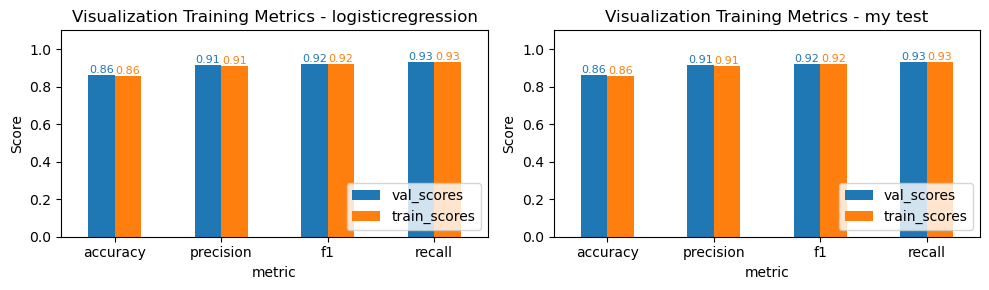

In [89]:
visualize_training_by_model(test)

In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)